# INFO 7374 Machine Learning in Finance

## Installing the datareader
### Remote Data Access

Functions from pandas_datareader.data and pandas_datareader.wb extract data from various Internet sources into a pandas DataFrame.

In [5]:
!pip install pandas_datareader

## Importing all the requried libraries 

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from datetime import datetime
import datetime
import math
import scipy.stats as ss
import seaborn as sns; sns.set(color_codes=True)
from scipy.optimize import minimize


# extract data from various Internet sources into a pandas DataFrame
import pandas_datareader as web

In [6]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2020, 1, 1)
df_amzn = web.DataReader('AMZN', 'yahoo', start, end) 
amzn= df_amzn
amzn=amzn.reset_index()
amzn['Date'] = pd.to_datetime(amzn['Date'])

# corresponding csv file is saved in an ouput directory 
#df_amzn.to_csv('data/data.csv')
amzn

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-02,1553.359985,1460.930054,1465.199951,1539.130005,7983100,1539.130005
1,2019-01-03,1538.000000,1497.109985,1520.010010,1500.280029,6975600,1500.280029
2,2019-01-04,1594.000000,1518.310059,1530.000000,1575.390015,9182600,1575.390015
3,2019-01-07,1634.560059,1589.189941,1602.310059,1629.510010,7993200,1629.510010
4,2019-01-08,1676.609985,1616.609985,1664.689941,1656.579956,8881400,1656.579956
...,...,...,...,...,...,...,...
247,2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961
248,2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020
249,2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049
250,2019-12-30,1884.000000,1840.619995,1874.000000,1846.890015,3674700,1846.890015


In [10]:
amzn.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [11]:
amzn.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,1802.590081,1773.117302,1788.746190,1789.189206,3.867974e+06,1789.189206
std,100.539397,103.057753,102.932941,101.313650,1.614055e+06,101.313650
min,1538.000000,1460.930054,1465.199951,1500.280029,8.813000e+05,1500.280029
25%,1747.589966,1718.234985,1736.189972,1735.845032,2.778875e+06,1735.845032
50%,1798.375000,1773.700012,1789.135010,1786.450012,3.475800e+06,1786.450012
75%,1868.277527,1836.732544,1848.475006,1855.319946,4.634700e+06,1855.319946
max,2035.800049,2003.869995,2025.619995,2020.989990,1.150620e+07,2020.989990


In Stock trading, the **high**, **low** refers to the maximum and the minimum prices in a given time period. **Open** and **Close** are thhighLowOpenClosee prices at which a stock began and ended trading in the same period. **Volume** is the total amount of trading activity. Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

![title](highLowOpenClose.png)


## Smoothing the curve with increase in Bandwith 
## adjusting amzn.Close 

In [1]:
def Kalman_Filter(Y):
    S = Y.shape[0]
    S = S + 1
    "Initialize Params:"
    Z = param0[0]
    T = param0[1]
    H = param0[2]
    Q = param0[3]
    # "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    KF_Dens = np.zeros(S)
    for s in range(1,S):
        if s == 1: 
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
        else: 
            F[s]= Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_predict[s];
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
            Likelihood = np.sum(KF_Dens[1:-1])  
            return Likelihood

In [2]:
def Kalman_Smoother(params, Y):
    S = Y.shape[0]
    S = S + 1
    "Initialize Params:"
    Z = params[0]
    T = params[1]
    H = params[2]
    Q = params[3]
    "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    for s in range(1,S):
        if s == 1: 
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
        else: 
            # "Please fill this part."
            F[s]= Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_predict[s];
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
    
    
            u_smooth = np.zeros(S)
            P_smooth = np.zeros(S)
            u_smooth[S-1] = u_update[S-1]
            P_smooth[S-1] = P_update[S-1]    
    for  t in range(S-1,0,-1):
     
        u_smooth[t-1] = u_update[t] +P_update[t]*np.transpose(T)/P_predict[t]*(u_smooth[t]- T*u_update[t])
        P_smooth[t-1] = P_update[t] + (P_update[t]*np.transpose(T)/P_predict[t]*(P_smooth[t]-P_update[t])/P_update[t]*T*P_update[t])
    
    u_smooth = u_smooth[0:-1]
    return u_smooth

In [7]:
amzn['Typical_Price'] = amzn[['High','Low','Close']].mean(axis=1)
amzn['lrets'] = (np.log(amzn.Close) - np.log(amzn.Close.shift(1))) * 100.
amzn.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets
0,2019-01-02,1553.359985,1460.930054,1465.199951,1539.130005,7983100,1539.130005,1517.806681,NaN
1,2019-01-03,1538.000000,1497.109985,1520.010010,1500.280029,6975600,1500.280029,1511.796672,-2.556555
2,2019-01-04,1594.000000,1518.310059,1530.000000,1575.390015,9182600,1575.390015,1562.566691,4.885109
3,2019-01-07,1634.560059,1589.189941,1602.310059,1629.510010,7993200,1629.510010,1617.753337,3.377649
4,2019-01-08,1676.609985,1616.609985,1664.689941,1656.579956,8881400,1656.579956,1649.933309,1.647585


C:\Users\Siddhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: OptimizeWarning: Unknown solver options: xtol
  import sys


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 6
         Gradient evaluations: 1


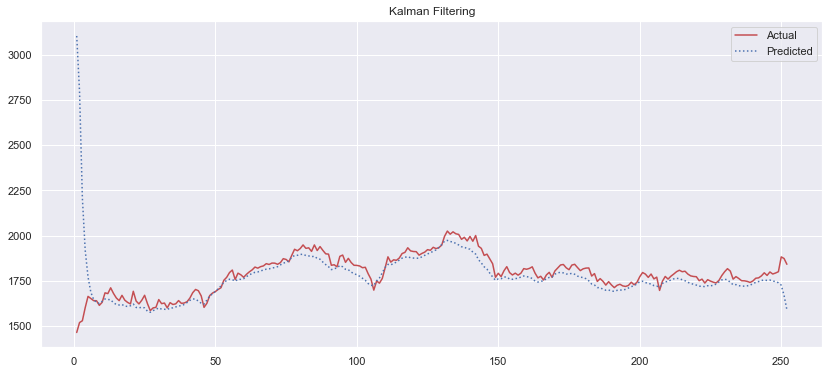

In [10]:
Y = amzn['Open']
T = Y.shape[0]
mu = 1196;


param0 = np.array([0.3, 0.9, 0.8, 1.1])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)

timevec = np.linspace(1,T,T)


fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, u,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("Kalman Filtering")
plt.show()

C:\Users\Siddhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: OptimizeWarning: Unknown solver options: xtol
  import sys


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 6
         Gradient evaluations: 1


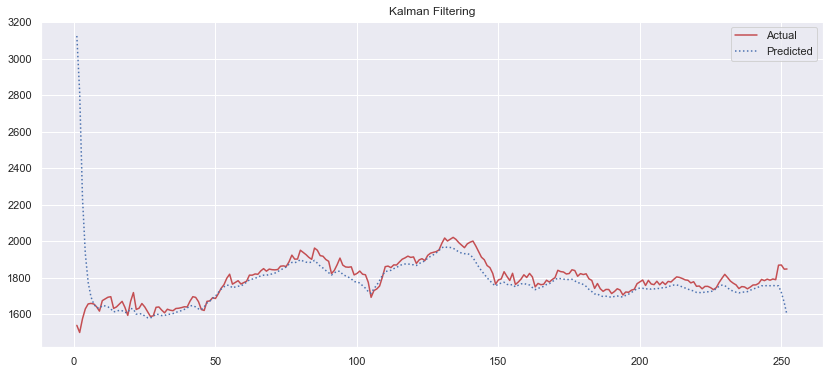

In [11]:
Y = amzn['Close']
T = Y.shape[0]
mu = 1196;


param0 = np.array([0.3, 0.9, 0.8, 1.1])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)

timevec = np.linspace(1,T,T)


fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, u,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("Kalman Filtering")
plt.show()

In [12]:

results = pd.DataFrame({'Actual': list(Y),
                  'Predicted' : list(u),
                  'Date':amzn['Date'],
                  'Open':amzn['Open'],
                  'Close':amzn['Close']
                       })

In [13]:

results.set_index('Date',inplace = True)
results.head(10)

,Actual,Predicted,Open,Close
Date,,,,
2019-01-02,1539.130005,3123.621619,1465.199951,1539.130005
2019-01-03,1500.280029,2815.077217,1520.010010,1500.280029
2019-01-04,1575.390015,2237.256221,1530.000000,1575.390015
2019-01-07,1629.510010,1931.675691,1602.310059,1629.510010
2019-01-08,1656.579956,1775.040353,1664.689941,1656.579956
2019-01-09,1659.420044,1694.994401,1652.979980,1659.420044
2019-01-10,1656.219971,1655.413894,1641.010010,1656.219971
2019-01-11,1640.560059,1636.341328,1640.550049,1640.560059
2019-01-14,1617.209961,1633.114342,1615.000000,1617.209961


# Citation

1. https://seaborn.pydata.org/generated/seaborn.kdeplot.html
2. https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
3. google Images 